In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

## BREAKFAST

In [2]:
breakfast=pd.read_csv("breakfast.csv")
breakfast['date']=pd.to_datetime(breakfast['date'])


# dropping the na values of attendance
train=breakfast[~(breakfast['attendance'].isna())].copy()
target=train['attendance']
train.drop(columns=['breakfast','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

(44, 8)


,date,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend
0,2018-10-22,26,59,0,0,0.0,0,1
1,2018-10-23,23,56,1,0,0.0,0,0
2,2018-10-24,22,43,2,0,0.0,0,0
3,2018-10-25,25,53,3,0,0.0,1,0
4,2018-10-26,24,54,4,0,0.0,0,0


In [3]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend,p1,p2
0,26,59,0,0,0.0,0,1,1534,0
1,23,56,1,0,0.0,0,0,1288,0
2,22,43,2,0,0.0,0,0,946,0
3,25,53,3,0,0.0,1,0,1325,0
4,24,54,4,0,0.0,0,0,1296,0


### Plot of fetaure vs target value

##### 1. Temperature vs Attendance

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


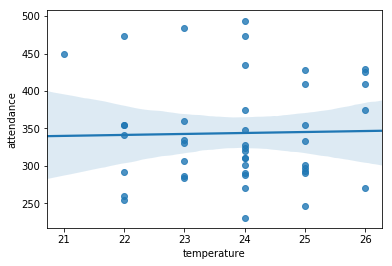

In [4]:
sns.regplot(train['temperature'], target)

##### 2. Humidity vs Attendance

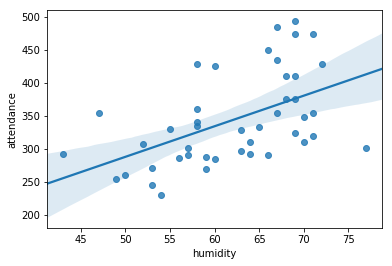

In [5]:
sns.regplot(x = train['humidity'], y = target)

##### 3. Weekday vs Attendance

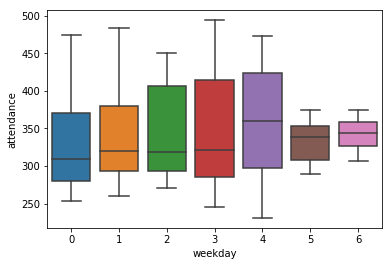

In [6]:
sns.boxplot(x = train['weekday'], y = target)

##### 4. is_exam vs Attendance

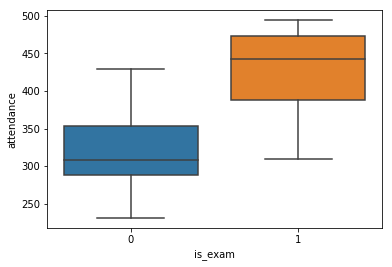

In [7]:
sns.boxplot(x = train['is_exam'], y = target)

##### 5. Number of Student giving exam vs Attendance

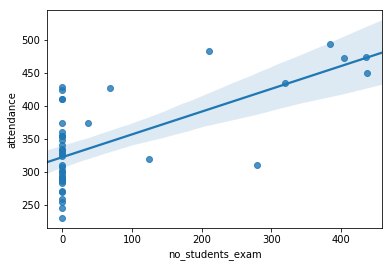

In [8]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Attendance

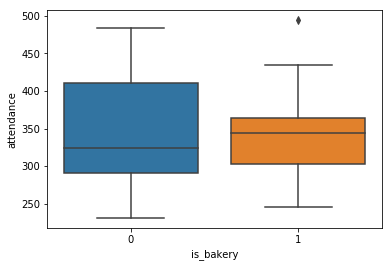

In [9]:
sns.boxplot(x = train['is_bakery'], y = target)

##### 7. is_weekend vs Attendance

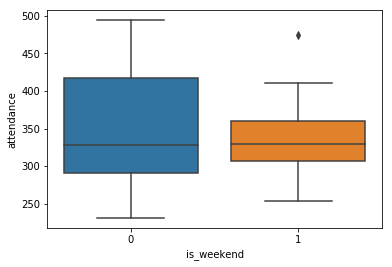

In [10]:
sns.boxplot(x = train['is_weekend'], y = target)

## TARGET DISTRIBUTION

Average Attendance: 343.79545454545456
Standard Deviation of Attendance: 68.76593354054374


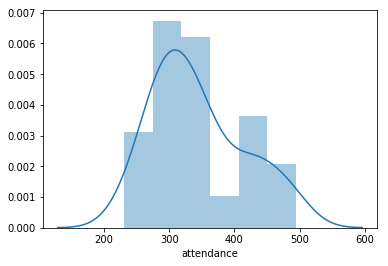

In [11]:
sns.distplot(target)
print("Average Attendance: {}".format(np.mean(target)))
print("Standard Deviation of Attendance: {}".format(np.std(target)))

##### Prediction

In [12]:
X=train.iloc[:,:]
y=target.values

print(X.shape,y.shape)

(44, 9) (44,)


In [13]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.5834202376063955
The mse is 1969.9030576472373


---

## LUNCH

In [14]:
lunch=pd.read_csv("lunch.csv")
lunch['date']=pd.to_datetime(lunch['date'])


# dropping the na values of attendance
train=lunch[~(lunch['attendance'].isna())].copy()
target=train['attendance']
train.drop(columns=['lunch','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

(45, 8)


,date,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend
0,2018-10-22,31,46,0,0,0.0,0,1
1,2018-10-23,32,38,1,0,0.0,0,0
2,2018-10-24,32,32,2,0,0.0,0,0
3,2018-10-25,32,39,3,0,0.0,1,0
4,2018-10-26,31,42,4,0,0.0,0,0


In [15]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend,p1,p2
0,31,46,0,0,0.0,0,1,1426,0
1,32,38,1,0,0.0,0,0,1216,0
2,32,32,2,0,0.0,0,0,1024,0
3,32,39,3,0,0.0,1,0,1248,0
4,31,42,4,0,0.0,0,0,1302,0


### Plot of feature vs Attendance

##### 1. Temperature vs Attendance

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


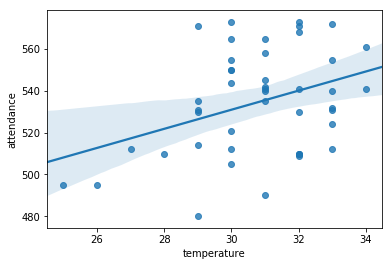

In [16]:
sns.regplot(x = train['temperature'], y = target)

##### 2.  Humdity vs Attendance

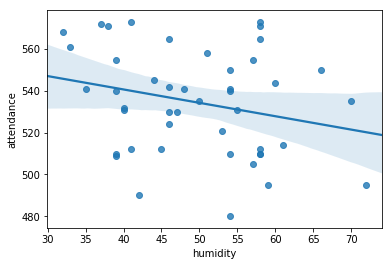

In [17]:
sns.regplot(train['humidity'], target)

##### 3. Weekday vs Attendance

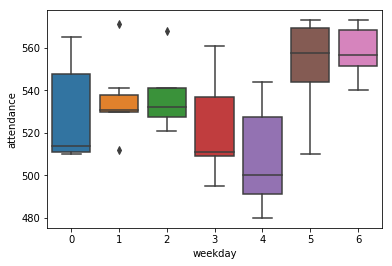

In [18]:
sns.boxplot(x = train['weekday'], y = target)

> Encoding= 0:Sunday, 1: Monday, 2: Tuesday...... 6: Friday

##### 4. is_exam vs Attendance

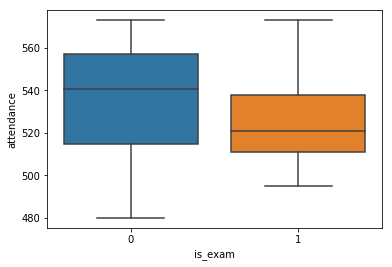

In [19]:
sns.boxplot(x = train['is_exam'], y = target)

##### 5. Number of students giving exam vs Attendance

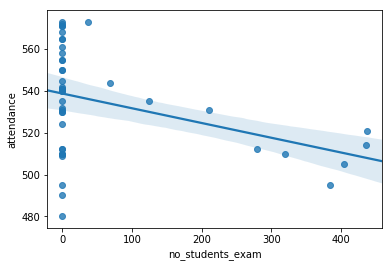

In [20]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Attendance

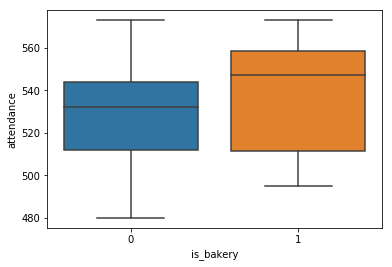

In [21]:
sns.boxplot(x = train['is_bakery'], y = target)

##### 7. is_weekend vs Attendance

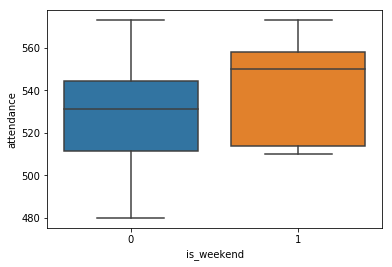

In [22]:
sns.boxplot(x = train['is_weekend'], y = target)

## TARGET DISTRIBUTION

Average Attendance: 534.5333333333333
Standard Deviation of Attendance: 24.645576569527524


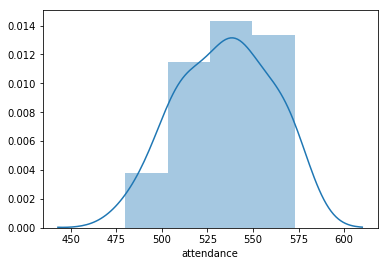

In [23]:
sns.distplot(target)
print("Average Attendance: {}".format(np.mean(target)))
print("Standard Deviation of Attendance: {}".format(np.std(target)))

#### Prediction

In [24]:
X=train.iloc[:,:]
y=target.values
print(X.shape,y.shape)

(45, 9) (45,)


In [25]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.3555754036604596
The mse is 391.42636392595386


---

## DINNER

In [26]:
dinner=pd.read_csv("dinner.csv")
dinner['date']=pd.to_datetime(dinner['date'])


# dropping the na values of attendance
train=dinner[~(dinner['attendance'].isna())].copy()
target=train['attendance']
train.drop(columns=['dinner','wastage','attendance'],inplace=True)

# sunday goes to zero and monday goes to 1...
train['weekday']=train['date'].dt.weekday
# train['is_weakend']

# exam days 
exam_days={'2018-11-22':1,
           '2018-11-23':1,
           '2018-11-26':1,
           '2018-11-27':1,
           '2018-11-28':1,
           '2018-11-29':1,
           '2018-11-30':1,
           '2018-12-01':1,
           '2018-12-03':1,
           '2018-12-04':1,
           '2018-12-05':1}

number_of_student_having_exam={'2018-11-22':320,
                              '2018-11-23':68,
                              '2018-11-26':436,
                              '2018-11-27':210,
                              '2018-11-28':437,
                              '2018-11-29':384,
                              '2018-11-30':405,
                              '2018-12-01':37,
                              '2018-12-03':279,
                              '2018-12-04':125}

train['is_exam']=train['date'].astype(str).map(exam_days)
train['is_exam'].fillna(0,inplace=True)
train['is_exam']=train["is_exam"].astype(int)

train['no_students_exam']=train['date'].astype(str).map(number_of_student_having_exam)
train['no_students_exam'].fillna(0,inplace=True)

# is bakery (on wed and saturaday)
bakery={0:0,1:0,2:0,3:1,4:0,5:0,6:1}
train['is_bakery']=train['weekday'].map(bakery)

# is week end
# students go outside and eat.
weekend={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
train['is_weekend']=train['weekday'].map(weekend)

print(train.shape)
train.head()

(45, 8)


,date,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend
0,2018-10-22,28,81,0,0,0.0,0,1
1,2018-10-23,27,68,1,0,0.0,0,0
2,2018-10-24,27,61,2,0,0.0,0,0
3,2018-10-25,28,56,3,0,0.0,1,0
4,2018-10-26,28,60,4,0,0.0,0,0


In [27]:
train['p1']=train['temperature']*train['humidity']
train['p2']=train['is_weekend']*train['is_exam']

train.drop(columns=['date'],inplace=True)
train.head()

,temperature,humidity,weekday,is_exam,no_students_exam,is_bakery,is_weekend,p1,p2
0,28,81,0,0,0.0,0,1,2268,0
1,27,68,1,0,0.0,0,0,1836,0
2,27,61,2,0,0.0,0,0,1647,0
3,28,56,3,0,0.0,1,0,1568,0
4,28,60,4,0,0.0,0,0,1680,0


### Plot of Feature vs Attendance

##### 1. Temperature vs Attendance

/home/amit/Documents/installation/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


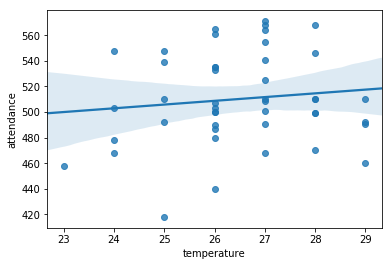

In [28]:
sns.regplot(x = train['temperature'], y = target)

##### 2. Humidity vs Attendance

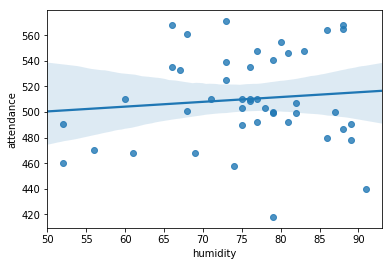

In [29]:
sns.regplot(x = train['humidity'], y = target)

##### 3. weekday vs Attendance

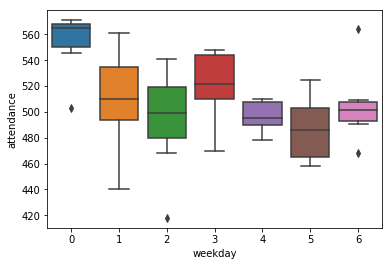

In [30]:
sns.boxplot(x = train['weekday'], y = target)

##### 4. is_exam vs Attendance

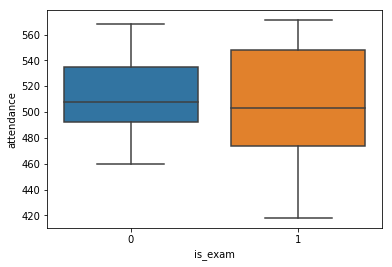

In [31]:
sns.boxplot(x = train['is_exam'], y = target)

##### 5. Number of Students giving exam vs Attendance

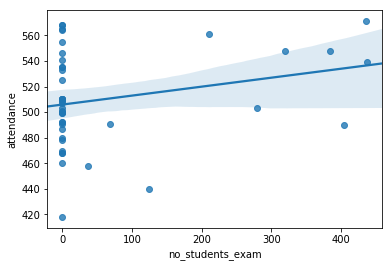

In [32]:
sns.regplot(x = train['no_students_exam'], y = target)

##### 6. is_bakery vs Attendance

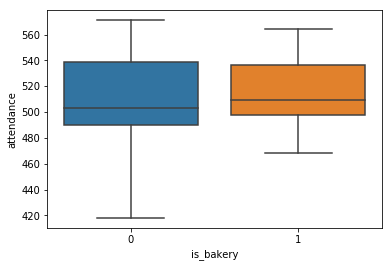

In [33]:
sns.boxplot(x = train['is_bakery'], y = target)

##### 7. is_weekend vs Attendance

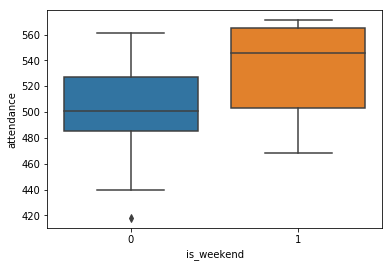

In [34]:
sns.boxplot(x = train['is_weekend'], y = target)

## TARGET DISTRIBUTION

Average Attendance: 510.1333333333333
Standard Deviation of Attendance: 35.76317162171784


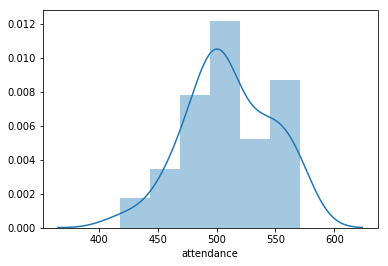

In [35]:
sns.distplot(target)
print("Average Attendance: {}".format(np.mean(target)))
print("Standard Deviation of Attendance: {}".format(np.std(target)))

##### Prediction

In [36]:
X=train.iloc[:,:]
y=target.values
print(X.shape,y.shape)

(45, 9) (45,)


In [37]:
lr=LinearRegression()
lr.fit(X,y)
print("The R2 score is",lr.score(X,y))
print("The mse is",mean_squared_error(lr.predict(X),y))

The R2 score is 0.5562074929861409
The mse is 567.612588881868
